Type of ML Task:

    Type: Supervised Learning

    Subtype: Multiclass Classification

    Objective: Predict the species of an iris flower based on features like petal and sepal length/width.



Load the Dataset

In [ ]:
# Import libraries
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Display top rows
df.head()

#print(df['species'].value_counts())


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Exploratory Data Analysis (EDA) & Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


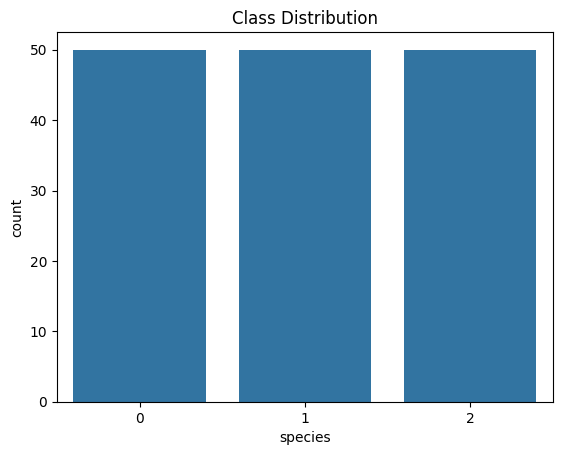

In [ ]:
sns.countplot(x='species', data=df)
plt.title("Class Distribution")
plt.show()

What It Shows You:

    Diagonal: Histograms (distribution) of individual features (e.g., sepal length).

    Off-diagonal cells: Scatter plots between every pair of features.

    Colored points: Each class (setosa, versicolor, virginica) is shown in a different color.

Example insight:

    You'll likely notice that petal length and width do a fantastic job of separating species visually.

    Setosa tends to cluster far away from the others—a sign it’s easy to classify!

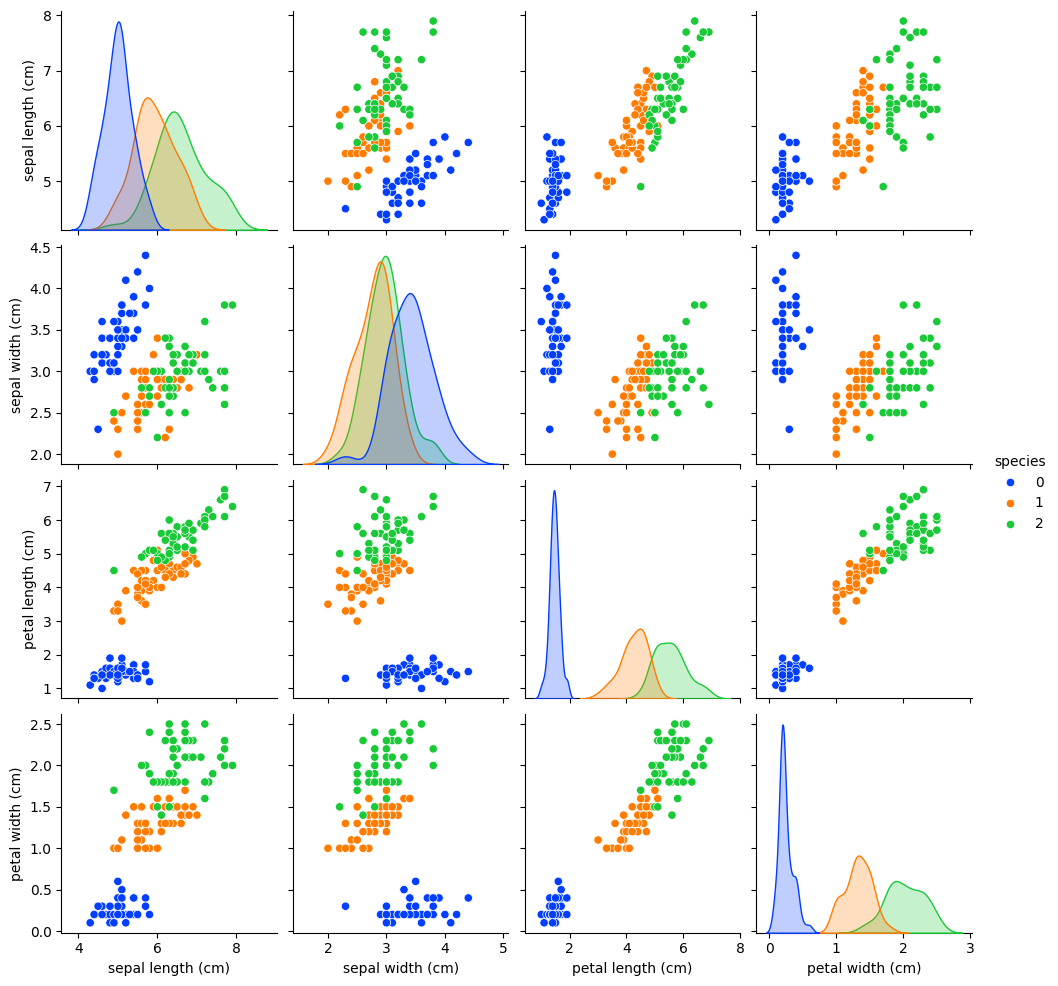

In [ ]:
# Pairplot to visualize feature relationships
sns.pairplot(df, hue="species", palette="bright")
plt.show()

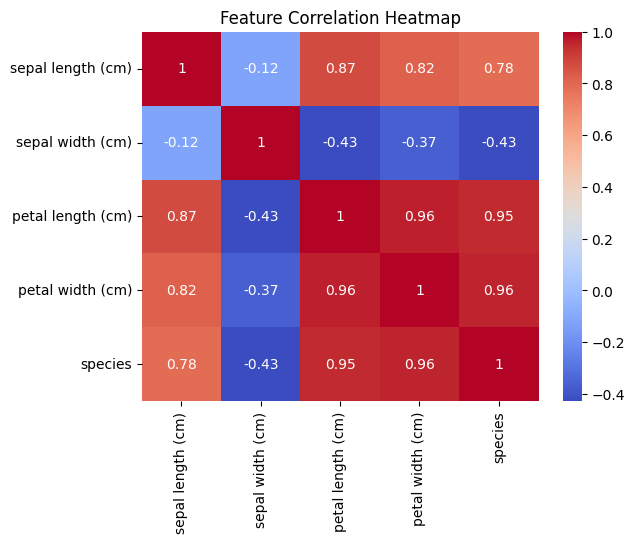

In [ ]:

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


    It's a visual representation of how strongly each numerical feature in your dataset is related to the others.

    df.corr(): Calculates the Pearson correlation coefficient between all numerical feature pairs (values range from -1 to +1).

    sns.heatmap(...): Shows those correlations in a color-coded matrix. Red = strong positive, Blue = strong negative.

Insight:

    petal length and petal width are very closely related — almost saying the same thing.

    sepal width doesn't help much; it might be a weak predictor.

    So, you can prioritize petal features in your model.

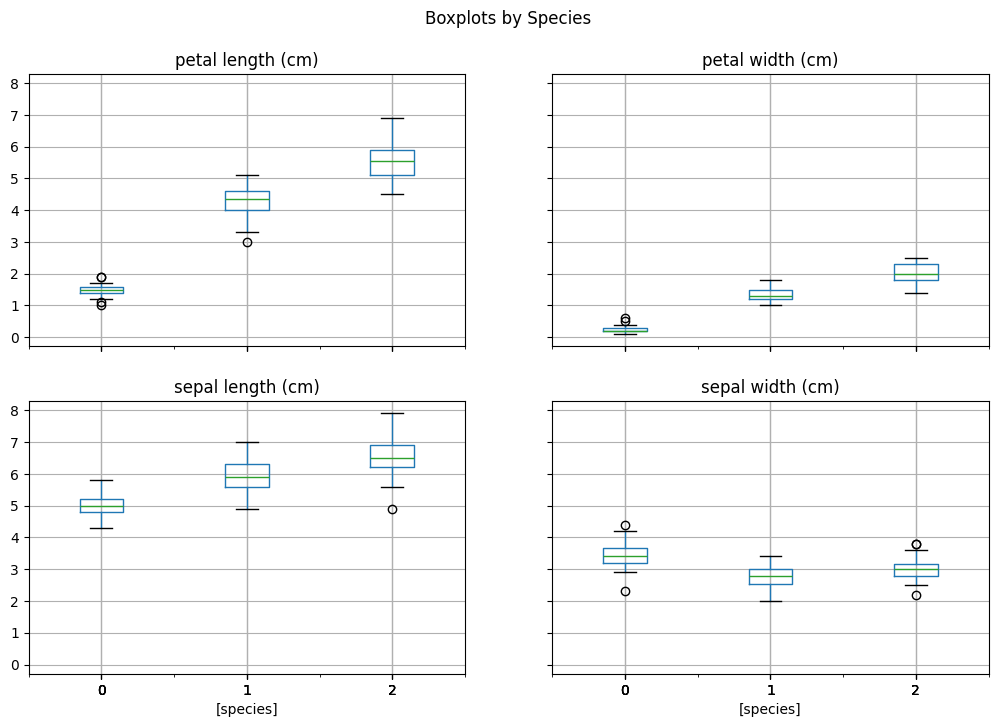

In [ ]:
# Box plot for each feature
df.boxplot(by='species', figsize=(12, 8))
plt.suptitle("Boxplots by Species")
plt.show()

| Feature          | Insight from Boxplot                                                            |
| ---------------- | ------------------------------------------------------------------------------- |
| **Petal Width**  | Setosa values are **clearly lower**—very strong feature for separation         |
| **Sepal Width**  | All species boxes **overlap a lot**—weak feature                               |
| **Petal Length** | Setosa is separate; Versicolor and Virginica overlap a bit—**moderate feature** |
| **Sepal Length** | Some overlap, but not too bad—**maybe useful**                                  |


Why It Matters for ML

    Helps you pick top features before training

    Tells you where normalization might be needed

    Highlights potential imbalanced or noisy data



In [ ]:
# === 3.1 Check for missing values ===
print("\n🔍 Missing Values:")
print(df.isnull().sum())


# If missing values exist (Iris has none), you can handle them like this:
# df.fillna(df.mean(), inplace=True)

# === 3.2 Drop irrelevant features (if any) ===
# Iris has 4 good features, but let's say we decide to drop one arbitrarily
# Example: drop 'sepal width (cm)'
df_cleaned = df.drop(columns=['sepal width (cm)'])
print("\nRemaining Features:", df_cleaned.columns.tolist())


🔍 Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Remaining Features: Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)',
       'species'],
      dtype='object')


This is called Min-Max Normalization.
It rescales all the numeric feature values to a range of [0, 1].

In [ ]:
# === 3.4 Normalize the feature columns manually ===
features = df_cleaned.drop('species', axis=1)
target = df_cleaned['species']

# Final DataFrame
df_processed = pd.concat([features, target], axis=1)
print("\nBefore Normalized & Cleaned Data:")
print(df_processed.head())

# Manual normalization: (x - min) / (max - min)
features_normalized = (features - features.min()) / (features.max() - features.min())

# Final DataFrame
df_processed = pd.concat([features_normalized, target], axis=1)
print("\nFinal Normalized & Cleaned Data:")
print(df_processed.head())




Before Normalized & Cleaned Data:
   sepal length (cm)  petal length (cm)  petal width (cm)  species
0                5.1                1.4               0.2        0
1                4.9                1.4               0.2        0
2                4.7                1.3               0.2        0
3                4.6                1.5               0.2        0
4                5.0                1.4               0.2        0

Final Normalized & Cleaned Data:
   sepal length (cm)  petal length (cm)  petal width (cm)  species
0           0.222222           0.067797          0.041667        0
1           0.166667           0.067797          0.041667        0
2           0.111111           0.050847          0.041667        0
3           0.083333           0.084746          0.041667        0
4           0.194444           0.067797          0.041667        0


✅ Accuracy Score: 1.0

📄 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



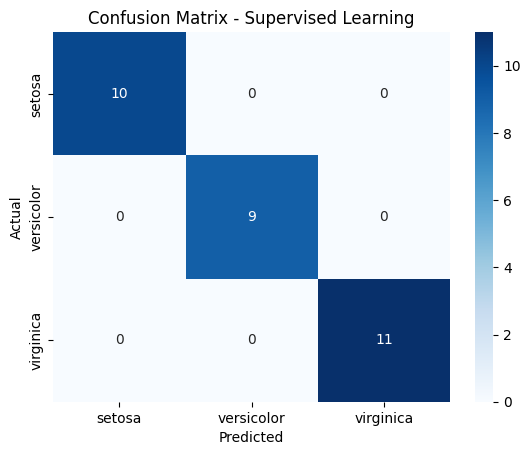

In [ ]:
# === Imports ===
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Load Dataset ===
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Target labels: 0=setosa, 1=versicolor, 2=virginica

# === 2. Split Features and Labels ===
X = df.drop('species', axis=1)  # Features
y = df['species']               # Target

# === 3. Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 4. Train a Logistic Regression Model ===
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# === 5. Make Predictions ===
y_pred = model.predict(X_test)

# === 6. Evaluate ===
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# === 7. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Supervised Learning")
plt.show()
